First need to import the mnist dataset

In [1]:
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [3]:
print(device)

cuda


In [4]:
transform=transforms.Compose([transforms.ToTensor()])
dataset1 = datasets.MNIST('./data', train=True, download=True,transform=transform)

In [5]:
train_kwargs = {'batch_size': 64}
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs, shuffle=True)


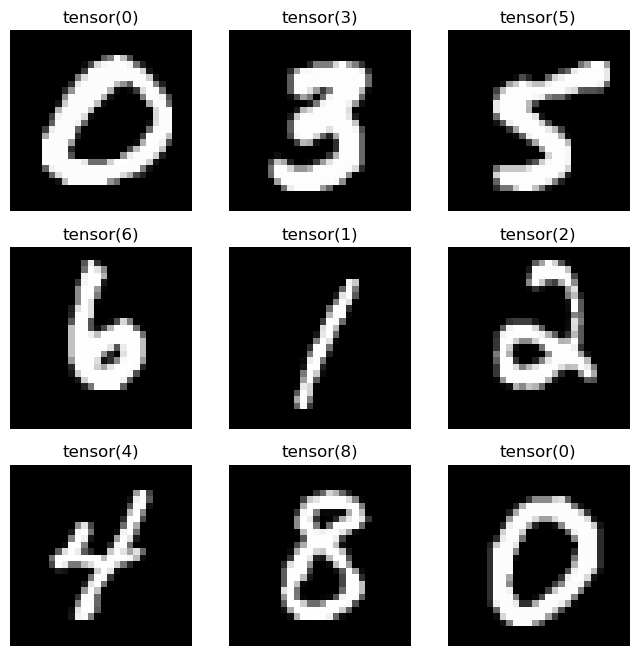

In [6]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    train_features, train_labels = next(iter(train_loader))
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    img = train_features[0].squeeze()
    label = train_labels[0]
    plt.title(label)
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

32 = batch size
1 = channels, only one here since its grayscale
28x28 = pixels
y = label

In [7]:
for X, y in train_loader:
    Xf = torch.flatten(X, end_dim=1)
    print(f"Shape of X [N, C, H, W]: {Xf.shape}")
    #print(f"C has type {X[0][0].dtype} and value {X[0]}")
    #print(f"Shape of y: {y.shape} {y.dtype} {y}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 28, 28])


if we want to get all the threes we will need to pull all the ones that match a given label


In [8]:
# when pulling direct from the dataset then N goes away and y is an int
for X, y in dataset1:
    print(f"Shape of X [C, H, W]: {X.shape}")
    print(f"C has type {X[0][0].dtype} and value {X[0]}")
    print(f"Shape of y: {y}")
    break


Shape of X [C, H, W]: torch.Size([1, 28, 28])
C has type torch.float32 and value tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [9]:
threes = [x.flatten(end_dim=1) for x, y in dataset1 if y == 3]
sevens = [x.flatten(end_dim=1) for x, y in dataset1 if y == 7]


In [10]:
print((len(threes), len(sevens)))
print(threes[0].dtype)

(6131, 6265)
torch.float32


In [11]:
stacked_threes = torch.stack(threes)
stacked_sevens = torch.stack(sevens)
stacked_threes.shape

torch.Size([6131, 28, 28])

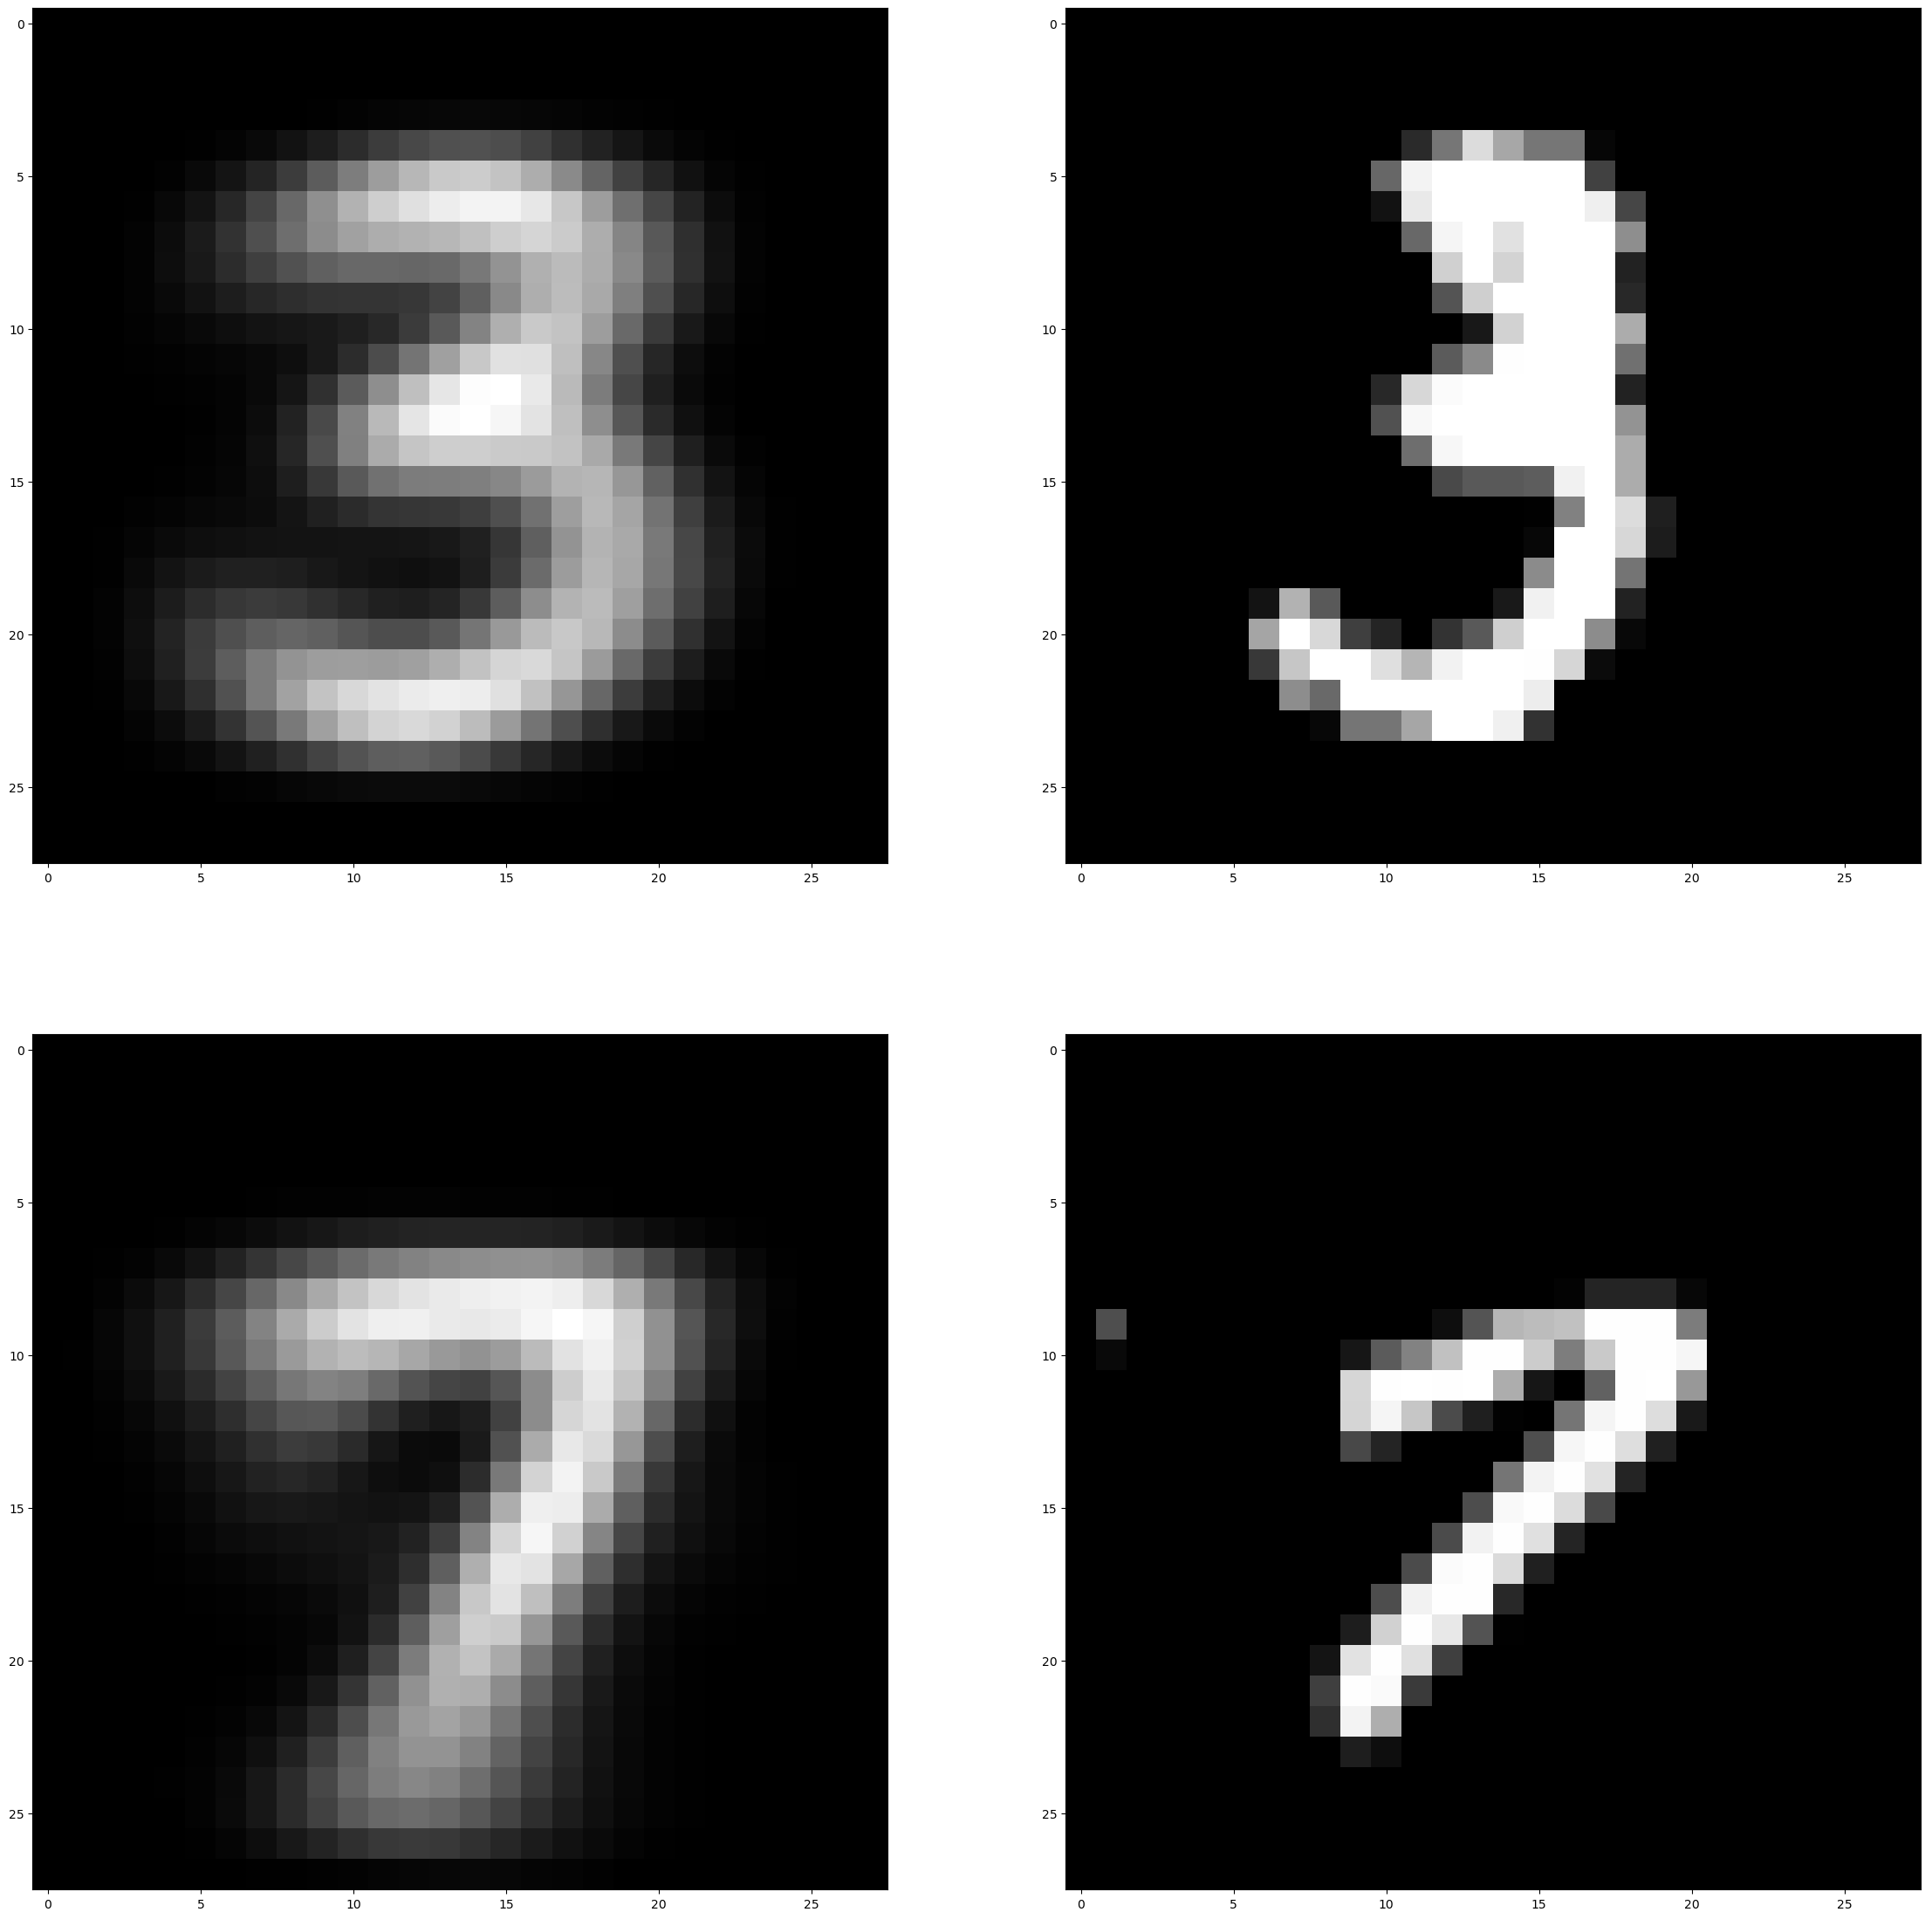

In [12]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
a_3 = stacked_threes[1]
a_7 = stacked_sevens[1]
figure = plt.figure(figsize=(28, 28))

#figure.add_subplot(rows, cols, i)
plt.axis("off")
subplot3mean = plt.subplot(221)
plt.imshow(mean3, cmap="gray")
subplot3 = plt.subplot(222)
plt.imshow(a_3, cmap="gray")
subplot7mean = plt.subplot(223)
plt.imshow(mean7, cmap="gray")
subplot7 = plt.subplot(224)
plt.imshow(a_7, cmap="gray")
plt.show()


In [13]:
import torch.nn.functional as F
# L1 loss gives mean abs value of diff (l1 norm), mse_loss gives mean squared error
print((F.l1_loss(a_3.float(),mean3), F.mse_loss(a_3,mean3).sqrt()))

print((F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()))


(tensor(0.1074), tensor(0.1912))
(tensor(0.1441), tensor(0.2780))


In [14]:
dataset2 = datasets.MNIST('./data/valid', train=False, download=True,transform=transform)


Above we see that both l1 and l2 losses are smaller when comparing a three to the mean of threes vs a seven

In [15]:
dataset2 = datasets.MNIST('./data/valid', train=False, download=True,transform=transform)
test_kwargs = {'batch_size': 64}
test_loader = torch.utils.data.DataLoader(dataset2,**train_kwargs, shuffle=True)


In [16]:
valid_3_tens = torch.stack([x.flatten(end_dim=1) for x, y in dataset2 if y == 3])
valid_7_tens = torch.stack([x.flatten(end_dim=1) for x, y in dataset2 if y == 7])
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [17]:
test = mean3.unsqueeze(0)
test = test.expand(1010,-1, -1)
test.shape

torch.Size([1010, 28, 28])

In [18]:
F.mse_loss(valid_3_tens,test)

tensor(0.0559)

In [19]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [20]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1789, 0.1170, 0.1271,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [21]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [22]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [23]:
is_3(valid_3_tens)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [24]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

Up to this point our digit classifier is just comparing the digit to the averaged digit from averaging all the training images.
If its is reporting the image to be closer to a 3 than a 7 then it reports it as a 3 and vice versa
There is no learning right now, just a static classifier compared to an average

In [25]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [26]:
train_y = torch.tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [27]:
train_y[12],train_y[12000]

(tensor([1]), tensor([0]))

In [28]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [29]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = torch.tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [30]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_() # note the training underscore setting the bool not returning it

In [31]:
weights = init_params((28*28,1))

In [32]:
bias = init_params(1)

In [33]:
(train_x[0] * weights.T).sum() + bias

tensor([3.6754], grad_fn=<AddBackward0>)

In [34]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ 3.6754],
        [ 1.6124],
        [ 2.4629],
        ...,
        [-0.4907],
        [-5.0159],
        [ 2.4078]], grad_fn=<AddBackward0>)

In [35]:
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [False]])

In [36]:
corrects.float().mean().item() #item takes it out of a tensor and returns a normal float

0.7883994579315186

In [37]:
with torch.no_grad(): weights[0] *= 1.0001 # need to use no_grad to do in place operation

preds = linear1(train_x)
((preds > 0.0).float() == train_y).float().mean().item()

0.7883994579315186

In [38]:
from torch import tensor
trgts = tensor([1,0,1]) # three images labeled as a 3, 7, 3
prds = tensor([0.9,0.4,0.2]) # simulated predictions, the last one is very off that it thinks its a 7

In [39]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean() #cuda friendly list comprehension

In [40]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [41]:

mnist_loss(prds, trgts)

tensor(0.4333)

In [42]:
mnist_loss(tensor([0.9,0.4,0.8]), trgts)

tensor(0.2333)

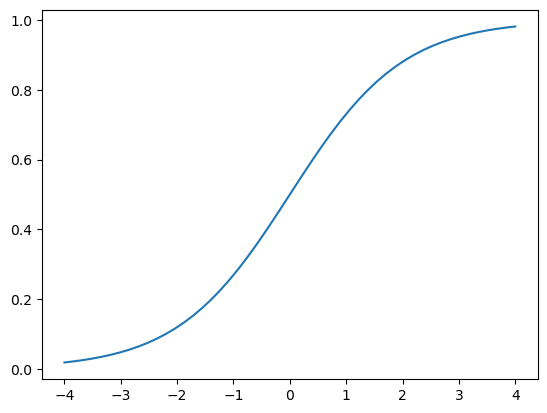

In [43]:
def sigmoid(x): return 1/(1+torch.exp(-x))

import numpy as np
x = tensor(np.linspace(-4, 4))
y = torch.sigmoid(x)

fig, ax = plt.subplots()
ax.plot(x, y)


In [44]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

Training loop
```
for x, y in dl:
    pred = model(x)
    loss = loss_func(pred,y)
    loss.backward()
    parameters -= parameters.grad * lr
```
    

In [45]:
weights = init_params((28*28,1))
bias = init_params(1)

weights.shape

torch.Size([784, 1])

In [112]:
train_kwargs = {'batch_size': 256}
dataset1 = datasets.MNIST('./data', train=True, download=True,transform=transform)

threes = [x.flatten(end_dim=1) for x, y in dataset1 if y == 3]
sevens = [x.flatten(end_dim=1) for x, y in dataset1 if y == 7]

stacked_threes = torch.stack(threes)
stacked_sevens = torch.stack(sevens)
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
dset = list(zip(train_x,train_y))

dl = torch.utils.data.DataLoader(dset,**train_kwargs, shuffle=True)

In [113]:
dataset2 = datasets.MNIST('./data/valid', train=False, download=True,transform=transform)

valid_3_tens = torch.stack([x.flatten(end_dim=1) for x, y in dataset2 if y == 3])
valid_7_tens = torch.stack([x.flatten(end_dim=1) for x, y in dataset2 if y == 7])

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

valid_dl = torch.utils.data.DataLoader(valid_dset,**train_kwargs, shuffle=True)

In [48]:
def linear1(xb): return xb@weights + bias


In [49]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [50]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        #xb = xb.flatten(start_dim=1,end_dim=3) 
        #yb = yb.unsqueeze(1)
        calc_grad(xb, yb, model)
        for p in params:
            #print(p.grad)
            p.data -= p.grad * lr # can assign data instead of turning off grad to avoid calculating gradient of update
            p.grad.zero_()
            #print(p.grad)


In [51]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [52]:
def validate_epoch(model):
    #accs = [batch_accuracy(model(xb.flatten(start_dim=1,end_dim=3)), yb.unsqueeze(1)) for xb, yb in valid_dl]
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [53]:
lr = 1
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.9195

In [54]:
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.9445

In [55]:
lr = 1
for i in range(15):
    #print(params[0])
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')


0.9529 0.9564 0.9597 0.9592 0.9597 0.9627 0.9627 0.9628 0.9637 0.9642 0.9647 0.9661 0.9682 0.9697 0.9702 

## Optimizer

In [56]:
linear_model = nn.Linear(28*28,1) # 28*28 inputs, one output becomes a (1, 784) tensor i.e. row matrix

In [57]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [58]:
class BasicOptim:
    def __init__(self, params, lr): self.params, self.lr = list(params), lr
    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr # todo: try again with turning off grad

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None
                                                                

In [59]:
lr = 1
opt = BasicOptim(linear_model.parameters(), lr)

In [60]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [61]:
validate_epoch(linear_model)

0.3329

In [66]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(linear_model))

In [67]:
train_model(linear_model, 20)

0.9823
0.9838
0.9823
0.9829
0.9844
0.9844
0.9844
0.9838
0.9848
0.9843
0.9848
0.9843
0.9834
0.9834
0.9829
0.9829
0.9843
0.9844
0.9828
0.9848


## Adding nonlinearity

In [64]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [65]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30, 1))
b2 = init_params(1)


In [68]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [106]:
def validate_epoch(model):
    #accs = [batch_accuracy(model(xb.flatten(start_dim=1,end_dim=3)), yb.unsqueeze(1)) for xb, yb in valid_dl]
    accs = [batch_accuracy(model(xb.to(device)), yb.to(device)) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [118]:
model = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30,1)
).to("cuda")

In [119]:
from torch.optim import SGD
opt = SGD(model.parameters(), lr = 0.1)
loss_history = []
for epoch in range(40):
    for x,y in dl:
        x = x.to(device)
        y = y.to(device)
        opt.zero_grad()
        loss = mnist_loss(model(x), y)
        loss.backward()
        opt.step()
    loss_history.append((epoch, validate_epoch(model)))
                          

In [120]:
loss_history

[(0, 0.9686),
 (1, 0.9687),
 (2, 0.9716),
 (3, 0.9711),
 (4, 0.9725),
 (5, 0.9736),
 (6, 0.975),
 (7, 0.9755),
 (8, 0.9769),
 (9, 0.976),
 (10, 0.9765),
 (11, 0.977),
 (12, 0.977),
 (13, 0.9774),
 (14, 0.9779),
 (15, 0.9789),
 (16, 0.9795),
 (17, 0.9794),
 (18, 0.9794),
 (19, 0.9789),
 (20, 0.9794),
 (21, 0.9794),
 (22, 0.9794),
 (23, 0.9799),
 (24, 0.9799),
 (25, 0.9798),
 (26, 0.9803),
 (27, 0.9804),
 (28, 0.9809),
 (29, 0.9814),
 (30, 0.9818),
 (31, 0.9814),
 (32, 0.9823),
 (33, 0.9824),
 (34, 0.9828),
 (35, 0.9834),
 (36, 0.9828),
 (37, 0.9828),
 (38, 0.9823),
 (39, 0.9838)]

In [107]:
validate_epoch(model)

0.9819